## Data Prep

In [1]:
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c digit-recognizer

 82% 5.00M/6.09M [00:00<00:00, 49.0MB/s]
100% 6.09M/6.09M [00:00<00:00, 56.4MB/s]
  0% 0.00/9.16M [00:00<?, ?B/s]
100% 9.16M/9.16M [00:00<00:00, 84.4MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 225MB/s]


In [5]:
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("./train.csv")

In [8]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
len(df)

42000

In [10]:
df = np.array(df)

In [11]:
X = np.array(df[:,1:])
Y = np.array(df[:,0])

In [12]:
X.shape, Y.shape

((42000, 784), (42000,))

In [13]:
X = X.reshape((42000, 28, 28))

In [14]:
import matplotlib.pyplot as plt

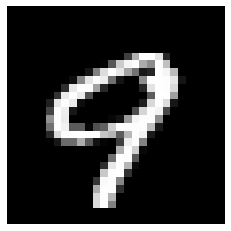

In [15]:
plt.axis('off')
plt.imshow(X[100], cmap='gray')
plt.show()

## Data Preprocessing

In [16]:
from keras.utils import to_categorical

In [17]:
## We will provide (28,28,1) Image
## We need to normalize the data
def preprocess_data(X,Y):
    
    X = X.reshape((-1, 28,28,1))
    X = X/255.0
    
    # Y should be one hot encoded
    Y = to_categorical(Y)
    
    return X,Y

In [18]:
XTrain, YTrain = preprocess_data(X, Y)

In [19]:
print(XTrain.shape, YTrain.shape)

(42000, 28, 28, 1) (42000, 10)


## Deep Neural Network

In [22]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [23]:
model = Sequential()

# Flatten the image
model.add(Flatten())

# Dense Layers ( or Hidden Layers )
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output :: 10 classes ( 0 to 9 )
model.add(Dense(10, activation='softmax'))


In [24]:
# Compile
model.compile(
    optimizer="adam",
    loss= "categorical_crossentropy",
    metrics= ['accuracy']
)

In [26]:
# Training ( Model already checked for Validation )
hist = model.fit(XTrain, YTrain, epochs=20, batch_size=256, validation_data=None)

Epoch 1/20
165/165 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.8879
Epoch 2/20
165/165 [==============================] - 0s 3ms/step - loss: 0.1517 - accuracy: 0.9550
Epoch 3/20
165/165 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.9705
Epoch 4/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.9772
Epoch 5/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0645 - accuracy: 0.9800
Epoch 6/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9879
Epoch 7/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9898
Epoch 8/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9928
Epoch 9/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9946
Epoch 10/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9947

In [27]:
dtest = pd.read_csv("./test.csv")

In [28]:
dtest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
Xtest = np.array(dtest)

In [30]:
Xtest.shape

(28000, 784)

In [31]:
Xtest = Xtest.reshape((-1, 28,28,1))
Xtest = Xtest/255.0

In [32]:
preds = model.predict_classes(Xtest)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [33]:
preds

array([2, 0, 9, ..., 3, 9, 2])

In [34]:
len(preds)

28000

In [35]:
labels = np.arange(1, len(preds))

In [36]:
labels

array([    1,     2,     3, ..., 27997, 27998, 27999])

In [37]:
ss = pd.read_csv("sample_submission.csv", index_col=None)

In [38]:
ss.tail()

,ImageId,Label
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0
27999,28000,0


In [39]:
ss["Label"] = preds

In [40]:
ss.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [41]:
ss.to_csv("Answer.csv", index=False)